In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('one_hand.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.352958,0.905714,-3.887141e-07,0.274080,0.828425,-0.050772,0.214708,0.709276,-0.084922,0.181025,...,0.491904,0.498852,-0.126173,0.438837,0.503234,-0.125134,0.400454,0.545615,-0.113202,1
1,0.320605,0.896185,-3.707819e-07,0.242289,0.821425,-0.045313,0.182537,0.706894,-0.077687,0.144752,...,0.439263,0.493865,-0.128205,0.384340,0.516462,-0.125119,0.349336,0.571848,-0.111444,1
2,0.295525,0.884164,-4.159965e-07,0.219434,0.815168,-0.044598,0.163121,0.702740,-0.076603,0.124876,...,0.406223,0.485169,-0.129511,0.351948,0.509613,-0.126536,0.320275,0.565734,-0.112856,1
3,0.297614,0.880797,-3.875938e-07,0.221857,0.811525,-0.046624,0.164747,0.695879,-0.079411,0.123693,...,0.403634,0.484941,-0.128259,0.349966,0.508396,-0.127024,0.318857,0.562999,-0.114726,1
4,0.343625,0.829705,-1.532444e-07,0.279094,0.787589,-0.036369,0.217465,0.675213,-0.061296,0.182320,...,0.456079,0.499837,-0.101874,0.411217,0.525897,-0.093211,0.388028,0.566399,-0.076002,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712,0.812033,0.828822,5.454259e-09,0.803732,0.763297,-0.055694,0.817079,0.690498,-0.077071,0.860042,...,0.932889,0.649633,-0.029341,0.912243,0.685153,-0.028813,0.893823,0.698044,-0.020717,Z
3713,0.806990,0.832166,7.534653e-08,0.801340,0.758497,-0.063454,0.817615,0.685873,-0.086746,0.859817,...,0.930032,0.647032,-0.018747,0.909742,0.677917,-0.022908,0.891014,0.692377,-0.017703,Z
3714,0.809800,0.830646,-1.224391e-08,0.801381,0.761296,-0.046902,0.815720,0.687082,-0.065278,0.859274,...,0.932917,0.647436,-0.030506,0.912674,0.678922,-0.028393,0.894184,0.692929,-0.019659,Z
3715,0.811622,0.827107,4.408286e-08,0.806487,0.755517,-0.059310,0.820062,0.685332,-0.081093,0.862113,...,0.931131,0.645080,-0.017588,0.912824,0.677398,-0.018952,0.894240,0.691118,-0.011731,Z


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.352958,0.905714,-3.887141e-07,0.274080,0.828425,-0.050772,0.214708,0.709276,-0.084922,0.181025,...,0.491904,0.498852,-0.126173,0.438837,0.503234,-0.125134,0.400454,0.545615,-0.113202,1
1,0.320605,0.896185,-3.707819e-07,0.242289,0.821425,-0.045313,0.182537,0.706894,-0.077687,0.144752,...,0.439263,0.493865,-0.128205,0.384340,0.516462,-0.125119,0.349336,0.571848,-0.111444,1
2,0.295525,0.884164,-4.159965e-07,0.219434,0.815168,-0.044598,0.163121,0.702740,-0.076603,0.124876,...,0.406223,0.485169,-0.129511,0.351948,0.509613,-0.126536,0.320275,0.565734,-0.112856,1
3,0.297614,0.880797,-3.875938e-07,0.221857,0.811525,-0.046624,0.164747,0.695879,-0.079411,0.123693,...,0.403634,0.484941,-0.128259,0.349966,0.508396,-0.127024,0.318857,0.562999,-0.114726,1
4,0.343625,0.829705,-1.532444e-07,0.279094,0.787589,-0.036369,0.217465,0.675213,-0.061296,0.182320,...,0.456079,0.499837,-0.101874,0.411217,0.525897,-0.093211,0.388028,0.566399,-0.076002,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712,0.812033,0.828822,5.454259e-09,0.803732,0.763297,-0.055694,0.817079,0.690498,-0.077071,0.860042,...,0.932889,0.649633,-0.029341,0.912243,0.685153,-0.028813,0.893823,0.698044,-0.020717,Z
3713,0.806990,0.832166,7.534653e-08,0.801340,0.758497,-0.063454,0.817615,0.685873,-0.086746,0.859817,...,0.930032,0.647032,-0.018747,0.909742,0.677917,-0.022908,0.891014,0.692377,-0.017703,Z
3714,0.809800,0.830646,-1.224391e-08,0.801381,0.761296,-0.046902,0.815720,0.687082,-0.065278,0.859274,...,0.932917,0.647436,-0.030506,0.912674,0.678922,-0.028393,0.894184,0.692929,-0.019659,Z
3715,0.811622,0.827107,4.408286e-08,0.806487,0.755517,-0.059310,0.820062,0.685332,-0.081093,0.862113,...,0.931131,0.645080,-0.017588,0.912824,0.677398,-0.018952,0.894240,0.691118,-0.011731,Z


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (3717, 63)
Labels shape = (3717,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['5', 'N', '8', 'I', 'A', '4', 'R', '5', 'R', 'Y', 'W', '1',
       'THUMS DOWN', '4', '2', '5', 'B', 'H', 'THUMS DOWN', '9', 'Y', 'R',
       'H', 'T', 'W', 'L', 'K', 'ROCK', 'ROCK', 'K', 'J', 'B', 'T', 'L',
       'D', 'V', 'Z', '5', 'Y', '4', 'D', 'O', 'Y', 'V', 'B', '1', '2',
       'U', 'Q', 'W', '2', 'D', 'B', 'R', '5', 'B', 'Q', 'Y', 'R', '6',
       'X', 'H', 'THUMS DOWN', 'P', 'Z', 'ROCK', 'F', 'E', 'J', 'U', 'D',
       '2', 'Q', 'D', 'J', 'L', 'G', '4', '4', 'D', 'A', 'G', 'J', 'D',
       'B', 'L', 'T', 'H', 'Z', 'W', 'K', '1', 'R', 'X', '5', '5', 'I',
       'C', 'V', 'B', 'THUMS DOWN', '4', 'F', 'M', 'Z', '5', 'C', 'S',
       'N', 'ROCK', '3', 'A', 'X', 'V', 'M', '8', 'N', 'A', 'S', 'M', 'P',
       'O', '1', 'I', 'D', 'X', 'A', 'THUMS UP', 'P', 'ROCK', 'F', '6',
       'N', 'U', '7', 'D', 'J', '4', '7', 'A', '4', 'H', 'S', 'F', 'D',
       '7', '9', 'Z', 'T', '8', 'V', '9', 'G', '7', 'X', 'F', 'E', 'S',
       'P', 'S', '5', 'O', 'X', '1', '4', 'K', 'Y', 'THUMS DO

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9825268817204301, 0.9825268817204301, 0.9825268817204301)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

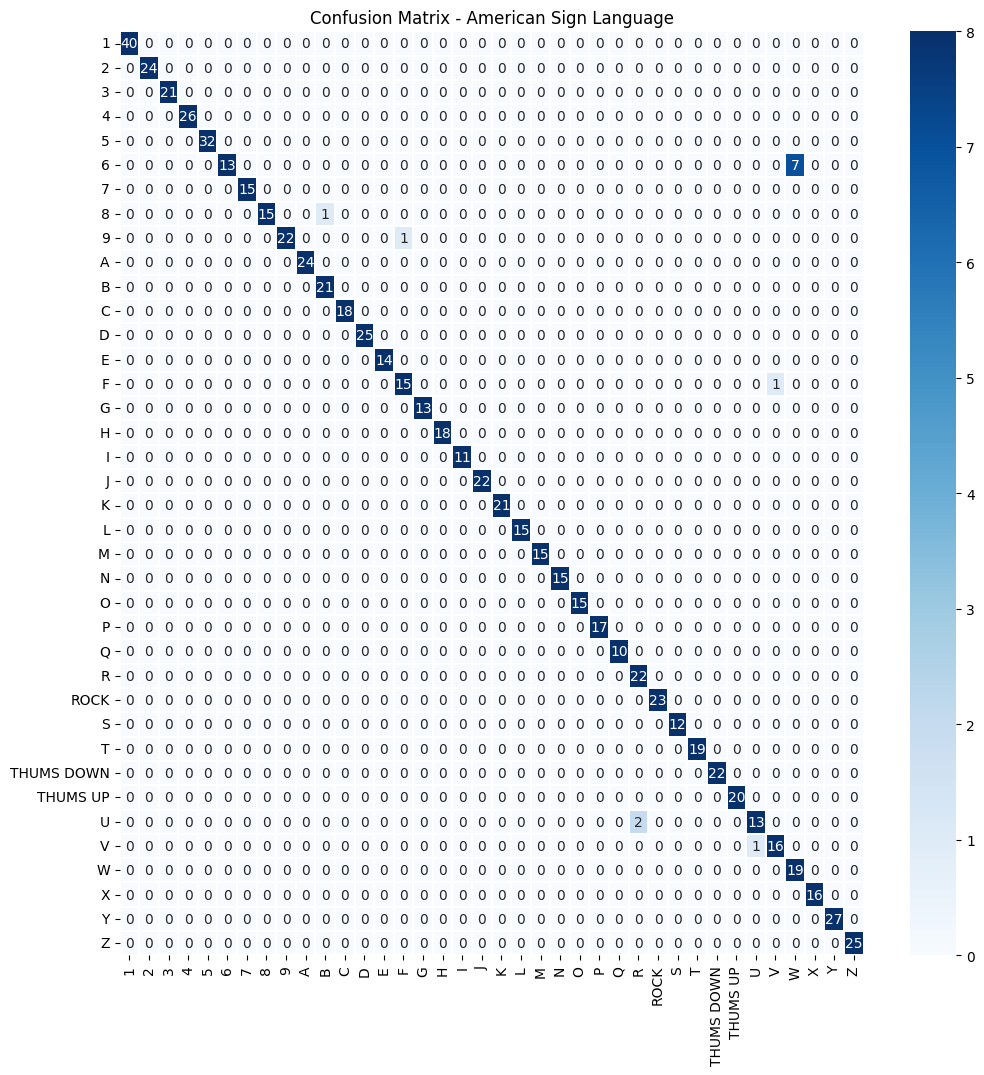

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [x for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [9]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)